In [2]:
import yaml
from joblib import load
import pandas as pd
from backend.utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "1h"
lookback_period: int = config['preprocess']['lookback_period']
trend_length: int = config['preprocess']['trend_length']
target_column: str = config['preprocess']['target']
testing_file_path: str = f"../data/twelvedata/feature time series ({interval})/NVDA_feature_time_series.csv"
testing_df: pd.DataFrame = pd.read_csv(testing_file_path)


FileNotFoundError: [Errno 2] No such file or directory: '../data/twelvedata/feature time series (1h)/NVDA_feature_time_series.csv'

In [2]:
testing_preprocessor = DataPreprocessor(testing_df, lookback_period, target_column, trend_length)

X_test: [[[float]]] = testing_preprocessor.feature_data_batched
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
y_test: [float] = testing_preprocessor.label_data


In [3]:
scaler = load('scaler.save')
X_test_scaled_reshaped = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)


In [4]:
print("Testing Dataset shape:", testing_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)
# %run ../tests/trend_provider_validator.py

Testing Dataset shape: (4970, 15)
Testing Dataset as time series batches: (4959, 9, 15) (4959,)


In [5]:
from keras.models import load_model
from backend.src.models.model_evaluator import ModelEvaluator

model_path: str = "../src/models/saved models/trained_StockTrendLSTM_model.keras"
model = load_model(model_path)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
y_pred_prob: [float] = model.predict(X_test_scaled).flatten()
y_pred: [int] = (y_pred_prob > 0.5).astype(int)

model_evaluator = ModelEvaluator(test_loss, y_test, y_pred)
metrics_df = model_evaluator.evaluation_metrics
metrics_df





155/155 [==============================] - 2s 4ms/step


,Metric,Score
0,Loss,0.626634
1,Accuracy,0.615447
2,Precision,0.587631
3,Recall,0.916159
4,F1Score,0.716009
5,ROC AUC,0.596837


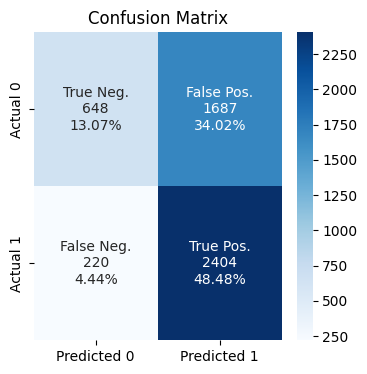

In [7]:
from backend.src.visualization.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)

In [8]:
from backend.src.visualization.visualizing_service import plot_correlation_heatmap
plot_correlation_heatmap(results)


NameError: name 'results' is not defined